<a href="https://colab.research.google.com/github/marcoseadr/Pos-graduacao-Big-Data/blob/main/Atividade_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Exploração Inicial de um Dataframe que possui o histórico da inflação anual em porcentagem de todos os países.

In [ ]:
#Exploração Inicial
inflacao = pd.read_csv('https://raw.githubusercontent.com/marcoseadr/Pos-graduacao-Big-Data/main/inflation_annual_percent.csv',)
display(inflacao.shape)
display(inflacao.head())
inflacao.dtypes

(212, 61)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.11,0.789,3.29,2,0.44,−1.37,1.61,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.6,7.3,4.82,0.567,2.45,−2.2,2.4,2.07,6.52,5.5
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.8,7.26,2.84,3.56,−3.52,21.8,22.6,29.1,28.1,15.1
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.31,1.04,0.289,1.55,0.564,−0.632,1.45,1.36,0.477,−0.965
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.197,0.175,0.448,−0.084,0.661,0.348,1.14,1.01,1.37,1.06


country    object
1960       object
1961       object
1962       object
1963       object
            ...  
2015       object
2016       object
2017       object
2018       object
2019       object
Length: 61, dtype: object

Para manipulação dos dados, convertemos as colunas com os anos em float64.

In [ ]:

cols = inflacao.columns[1:] #Seleção de colunas
inflacao[cols] = inflacao[cols].apply(pd.to_numeric, errors='coerce') # convertendo colunas para float64
inflacao.dtypes

country     object
1960       float64
1961       float64
1962       float64
1963       float64
            ...   
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
Length: 61, dtype: object

Registro histórico da inflação no Brasil

In [ ]:

g = inflacao.drop(columns=['country']) #Retirando a coluna 'country' para plotar o gráfico, a coluna é object

BR = g.loc[26]  # Selecionando o Brasil

BR


1960      31.30
1961      78.80
1962      69.80
1963      93.80
1964      51.40
1965      39.40
1966      29.20
1967      26.70
1968      20.90
1969      17.10
1970      20.30
1971      19.10
1972      22.70
1973      34.80
1974      33.90
1975      47.60
1976      46.20
1977      41.10
1978      56.50
1979      87.30
1980     107.00
1981     105.00
1982     140.00
1983     213.00
1984     232.00
1985     145.00
1986     204.00
1987     651.00
1988    1210.00
1989    2700.00
1990     414.00
1991     968.00
1992    2000.00
1993    2300.00
1994      89.50
1995      18.50
1996       7.73
1997       4.92
1998       8.01
1999       5.61
2000       8.23
2001       9.80
2002      14.10
2003       7.75
2004       7.43
2005       6.77
2006       6.44
2007       8.78
2008       7.31
2009       8.42
2010       8.32
2011       7.94
2012       7.50
2013       7.85
2014       7.57
2015       8.10
2016       3.67
2017       4.49
2018       4.28
2019       4.81
Name: 26, dtype: float64

No gráfico é possível visualizar a aplicação do Plano Real em 1994 e estabilização da inflação pós Plano Real.


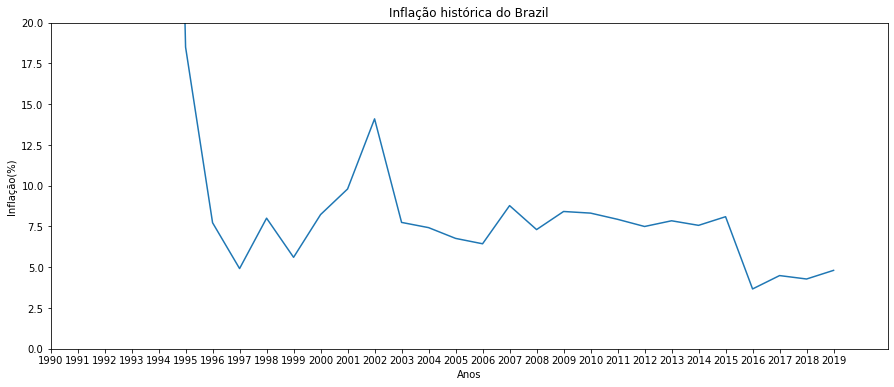

In [ ]:
# Aplicação do plano Real 
# É possível identificar a eficácia da implementação do plano Real para contenção da inflação
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(BR)  
ax.set(xlim=[30, 61],ylim=[0,20], xlabel='Anos', ylabel='Inflação(%)', title='Inflação histórica do Brazil')
plt.show()  # Gráfico inflação Brazil

No gráfico é possível visualizar as maiores inflações no último ano de registro do Dataframe.

[Text(0, 0.5, 'Países'),
 Text(0.5, 0, 'Inflação(%)'),
 Text(0.5, 1.0, 'Países com maiores inflações em 2019')]

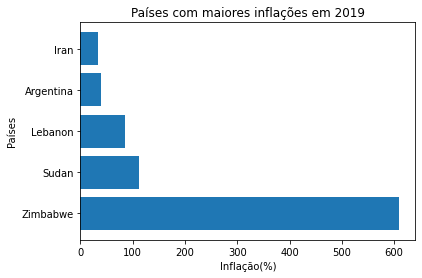

In [ ]:

inf2019 = inflacao.nlargest(5, '2019')
inf2019
x = inf2019.country
y = inf2019['2019']
fig, ax = plt.subplots()
ax.barh(x, y)
ax.set(xlabel='Inflação(%)', ylabel='Países',
       title='Países com maiores inflações em 2019')

E na sequência as menores inflações em 2019

[Text(0, 0.5, 'Países'),
 Text(0.5, 0, 'Inflação(%)'),
 Text(0.5, 1.0, 'Países com menores inflações em 2019')]

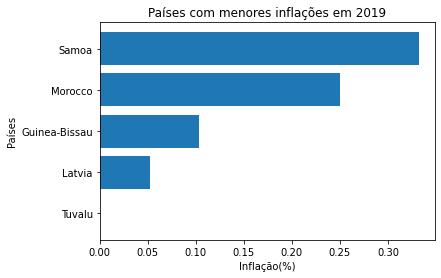

In [ ]:
inf2019 = inflacao.nsmallest(5, '2019')
inf2019
x = inf2019.country
y = inf2019['2019']
fig, ax = plt.subplots()
ax.barh(x, y)
ax.set(xlabel='Inflação(%)', ylabel='Países',
       title='Países com menores inflações em 2019')

O desenvolvimento da tarefa trouxe uma amostra das diversas formas de trabalhar e manipular os dados, de como um dataframe não muito grande é possível extrair muita informação. A escolha de um dataframe da inflação dos países pesou pelo tema inflação estar sempre em evidência, por impactar a economia do país e o poder de compra das pessoas. E análise realizada traz algumas informações sobre o tema.